# IMPORT LIBRARY

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import gdown

from scipy.stats import shapiro
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# LOAD DATASET

## METADATA

Features Information

- **brand:** Pizza brand (class label)
- **id:** Sample analysed
- **mois:** Amount of water per 100 grams in the sample
- **prot:** Amount of protein per 100 grams in the sample
- **fat:** Amount of fat per 100 grams in the sample
- **ash:** Amount of ash per 100 grams in the sample
- **sodium:** Amount of sodium per 100 grams in the sample
- **carb:** Amount of carbohydrates per 100 grams in the sample
- **cal:** Amount of calories per 100 grams in the sample

 - Dataset sources     : https://www.kaggle.com/datasets/sdhilip/nutrient-analysis-of-pizzas
 - Notebook References :
    - https://statisticsglobe.com/principal-component-analysis-python
    - https://statisticsglobe.com/biplot-pca-explained

In [2]:
# Replace 'output' with the desired output filename
output = 'Pizza.csv'

# Replace 'url' with the Google Drive file URL
url = 'https://drive.google.com/uc?id=1SbuqoP9Eq5jXJjfq3l4RBoMHlCf1k8zl'

# Download the file with the specified output filename
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1SbuqoP9Eq5jXJjfq3l4RBoMHlCf1k8zl
To: /content/Pizza.csv
100%|██████████| 13.9k/13.9k [00:00<00:00, 15.2MB/s]


'Pizza.csv'

In [3]:
df = pd.read_csv(output)
df.head(3)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95


# DATA PREPARATION

## DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [5]:
df.shape

(300, 9)

In [6]:
df.isnull().sum()

brand     0
id        0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [7]:
df.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


<ipython-input-8-c9ecafa5df2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation between features')

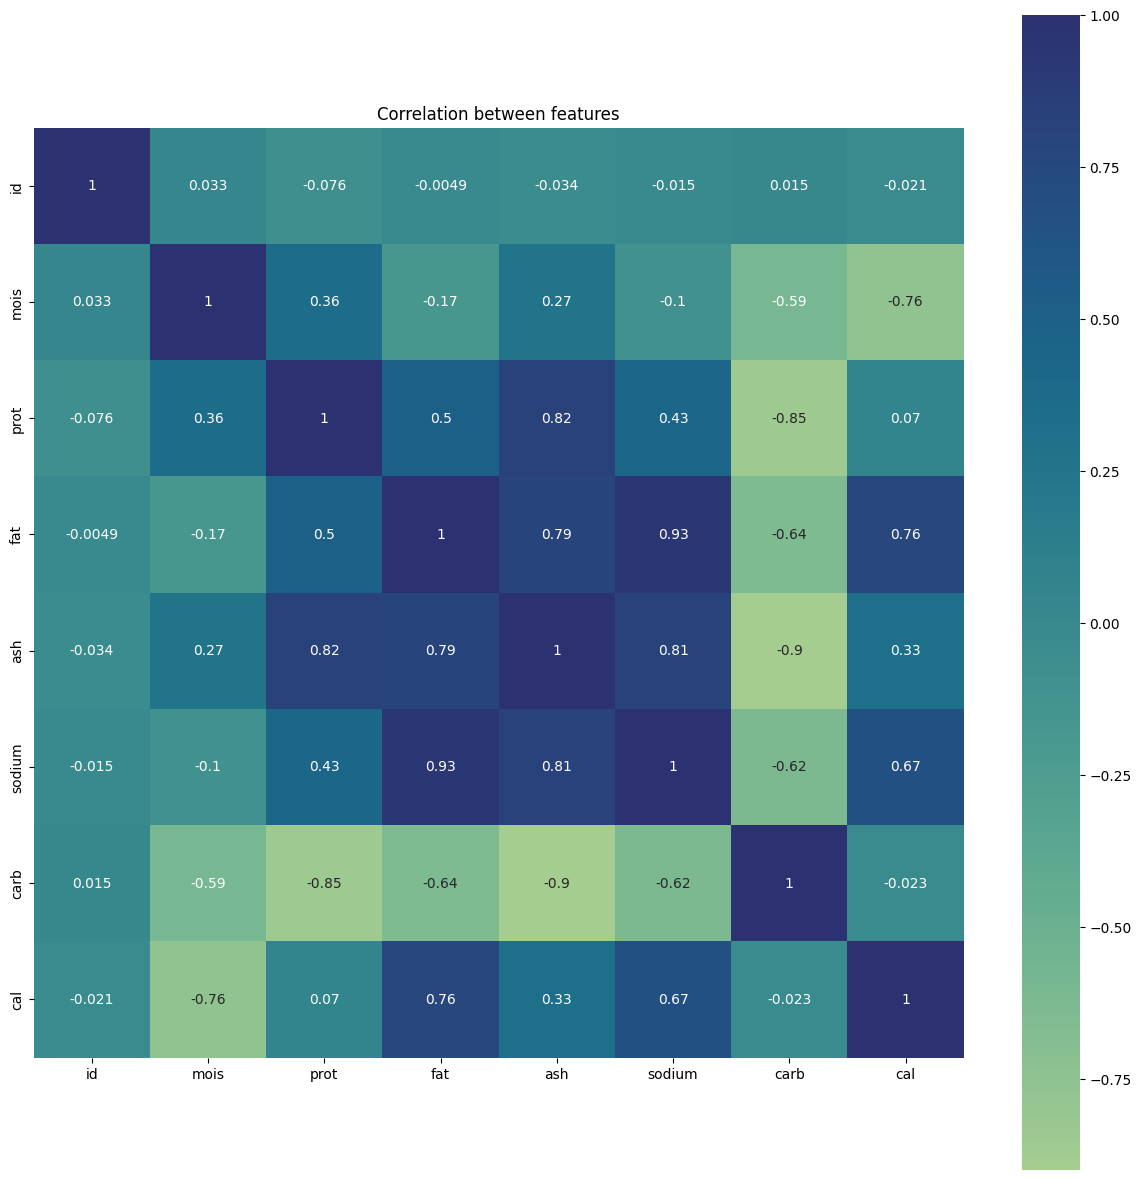

In [8]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True,annot=True,cmap='crest')
plt.title('Correlation between features')

In [9]:
# Assuming df is your DataFrame
normality_results = []

for column in df.iloc[:,2:].columns:
    stat, p_value = shapiro(df.iloc[:,2:][column])
    is_normal = p_value > 0.05  # Assuming a significance level of 0.05

    normality_results.append({'Column': column, 'Is_Normal': is_normal})

# Create a DataFrame from the results
normality_df = pd.DataFrame(normality_results)

# Print the DataFrame
print(normality_df)

   Column  Is_Normal
0    mois      False
1    prot      False
2     fat      False
3     ash      False
4  sodium      False
5    carb      False
6     cal      False


## DATA PREPROCESSING

In [10]:
data = df.iloc[:,2:]

In [11]:
data.columns = ['Moisture', 'Protein', 'Fat', 'Ash', 'Sodium', 'Carbo', 'Calories']

**Standarization**

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [13]:
df_scaled = pd.DataFrame(data_scaled,columns = data.columns)
df_scaled.head()

,Moisture,Protein,Fat,Ash,Sodium,Carbo,Calories
0,-1.371815,1.254181,2.749841,1.953894,2.976687,-1.227511,2.680129
1,-1.301562,1.227717,2.640475,2.135338,3.030779,-1.213622,2.534733
2,-1.316242,1.030010,2.851396,1.930227,2.598042,-1.225844,2.712439
3,-1.085563,1.054918,2.555660,1.701449,2.543950,-1.193622,2.373183
4,-1.091854,1.230830,2.390494,1.725116,2.625088,-1.172510,2.260097


# PCA

## PCA MANUALLY

In [14]:
X = data_scaled

**CALCULATING COVARIANCE MATRIX**



In [15]:
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00334448  0.36145252 -0.17189118  0.26644367 -0.10262097 -0.59378092
  -0.7669972 ]
 [ 0.36145252  1.00334448  0.49966723  0.82659903  0.43056473 -0.85639691
   0.07049308]
 [-0.17189118  0.49966723  1.00334448  0.79428157  0.93644671 -0.64237943
   0.76712418]
 [ 0.26644367  0.82659903  0.79428157  1.00334448  0.8108249  -0.90199502
   0.32756032]
 [-0.10262097  0.43056473  0.93644671  0.8108249   1.00334448 -0.6222505
   0.67420485]
 [-0.59378092 -0.85639691 -0.64237943 -0.90199502 -0.6222505   1.00334448
  -0.02356313]
 [-0.7669972   0.07049308  0.76712418  0.32756032  0.67420485 -0.02356313
   1.00334448]]


**(OVERALL) EIGEN VALUE AND EIGEN VECTOR**



In [16]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 6.47093729e-02  6.28275866e-01 -4.21668945e-01 -2.20721584e-01
   6.47029345e-03 -4.46449902e-01 -4.18569035e-01]
 [ 3.78760904e-01  2.69706650e-01  7.46027442e-01 -1.05931982e-02
   3.87982788e-01  1.71520299e-04 -2.76764643e-01]
 [ 4.46665915e-01 -2.34379085e-01 -1.99308714e-01 -5.07042158e-01
  -1.73367634e-01  5.25402868e-01 -3.77671525e-01]
 [ 4.71889526e-01  1.10990417e-01  5.62726863e-02  5.52398549e-01
  -6.70885701e-01 -5.88609281e-02 -5.60214003e-02]
 [ 4.35702887e-01 -2.01661652e-01 -4.55168874e-01  4.46276890e-01
   6.02614079e-01 -3.13098518e-03  5.24323817e-04]
 [-4.24913712e-01 -3.20312078e-01  5.22365058e-02  3.34339481e-01
  -7.43689883e-03  5.08853525e-04 -7.76067911e-01]
 [ 2.44487304e-01 -5.67457559e-01  1.13315588e-01 -2.79263154e-01
  -7.80031747e-02 -7.21913853e-01 -1.20598098e-02]]

Eigenvalues 
[4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]


In [17]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.185734344155204
2.298117780462199
0.41594883840533325
0.09549253576017107
0.027769583355683018
0.0003387384831468388
9.550615721269482e-06


**IDENTIFY THE IDEAL NUMBER OF COMPONENTS**



In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

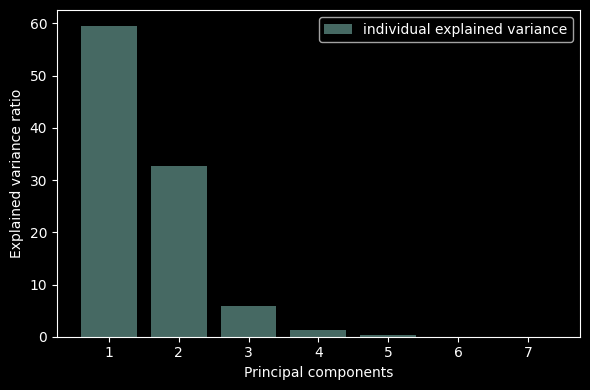

In [19]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(1,8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
print(var_exp[:2])
sum(var_exp[:2])

[59.5968842334479, 32.72081982658083]


92.31770406002873

In [21]:
eigen_value_manual = eig_vals[:2]

In [22]:
eigen_vector_manual = np.hstack((eig_pairs[0][1].reshape(7,1),
                      eig_pairs[1][1].reshape(7,1),
                    ))
print('eigen_vector_manual:\n', eigen_vector_manual)

eigen_vector_manual:
 [[ 0.06470937  0.62827587]
 [ 0.3787609   0.26970665]
 [ 0.44666592 -0.23437908]
 [ 0.47188953  0.11099042]
 [ 0.43570289 -0.20166165]
 [-0.42491371 -0.32031208]
 [ 0.2444873  -0.56745756]]


In [24]:
Y = X.dot(eigen_vector_manual)
df_pc_manual = pd.DataFrame(Y,columns=['PC1','PC2'])
df_pc_manual # New Feature

,PC1,PC2
0,5.010343,-2.679215
1,5.023755,-2.529295
2,4.805439,-2.673700
3,4.469543,-2.285029
4,4.471893,-2.159152
...,...,...
295,-0.535510,0.530843
296,-0.339636,0.243230
297,-0.646433,0.515434
298,-0.865078,0.921790


## SCIKIT LEARN PCA

**IDENTIFY THE IDEAL NUMBER OF COMPONENTS**

In [25]:
pca = PCA(n_components = 7)
pca_trans = pca.fit_transform(df_scaled)
print(pca_trans.shape)
pca_trans

(300, 7)


array([[ 5.01034284e+00,  2.67921532e+00, -3.93268132e-02, ...,
        -2.84015338e-01,  2.33883199e-03, -9.60239802e-04],
       [ 5.02375538e+00,  2.52929455e+00, -9.70564299e-02, ...,
        -2.15268884e-01, -2.95190997e-03, -1.02204030e-03],
       [ 4.80543930e+00,  2.67370033e+00, -7.54750714e-02, ...,
         3.50375561e-02, -5.42367516e-03, -8.31756992e-04],
       ...,
       [-6.46432696e-01, -5.15433604e-01, -3.70378252e-01, ...,
        -4.35570456e-02, -2.11048891e-03, -2.38808704e-04],
       [-8.65078270e-01, -9.21790425e-01, -4.93755001e-01, ...,
         2.43420521e-02, -1.82275203e-03, -1.63034757e-04],
       [-8.95868414e-01, -7.67878473e-01, -5.30107575e-01, ...,
         2.64133916e-02, -1.01749397e-04, -1.38425944e-04]])

In [26]:
proportional_var = pca.explained_variance_ratio_
proportional_var

array([5.95968842e-01, 3.27208198e-01, 5.92231918e-02, 1.35963182e-02,
       3.95385973e-03, 4.82299078e-05, 1.35982576e-06])

In [27]:
PC_number = np.arange(pca.n_components_)+1

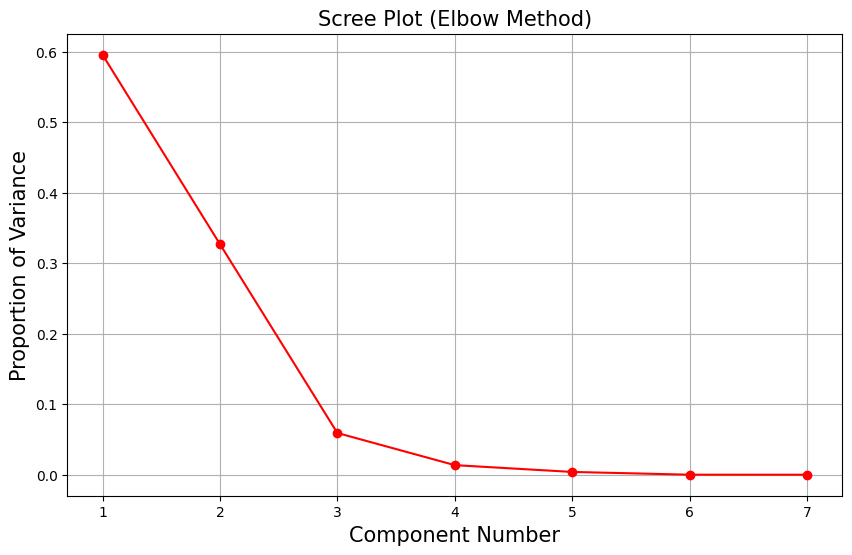

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(PC_number, proportional_var,'ro-')
plt.title('Scree Plot (Elbow Method)',fontsize = 15)
plt.xlabel('Component Number', fontsize = 15)
plt.ylabel('Proportion of Variance',fontsize = 15)
plt.grid()
plt.show()

In [29]:
var = pca.explained_variance_
var

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

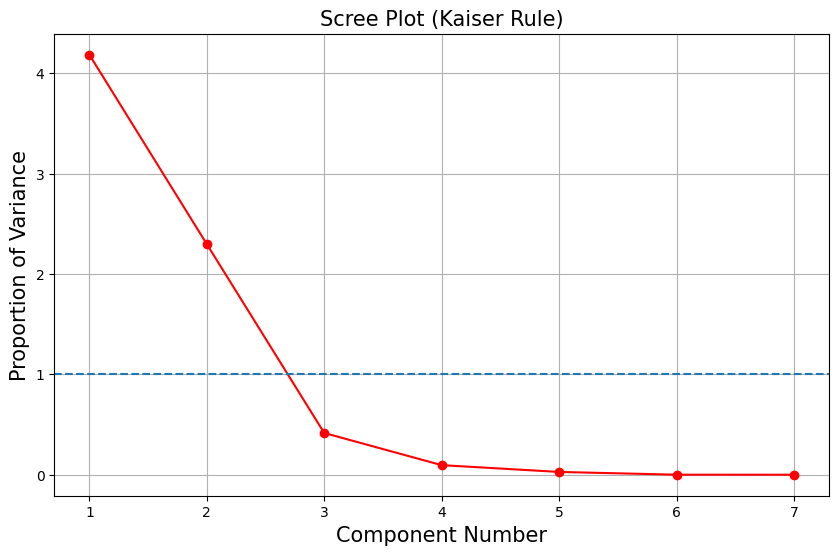

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(PC_number, var,'ro-')
plt.title('Scree Plot (Kaiser Rule)',fontsize = 15)
plt.xlabel('Component Number', fontsize = 15)
plt.ylabel('Proportion of Variance',fontsize = 15)
plt.axhline(y=1,linestyle='--')
plt.grid()
plt.show()

In [31]:
tot = sum(var)
var_exp = [(i / tot)*100 for i in sorted(var, reverse=True)]
sum(var_exp[:2])

92.31770406002873

**FIT THE PCA USING IDEAL NUMBER OF COMPONENTS**

In [32]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(df_scaled)
print(pc.shape)

(300, 2)


In [33]:
pca.explained_variance_ # eigen value

array([4.18573434, 2.29811778])

In [34]:
pca.components_ # eigen vector

array([[ 0.06470937,  0.3787609 ,  0.44666592,  0.47188953,  0.43570289,
        -0.42491371,  0.2444873 ],
       [-0.62827587, -0.26970665,  0.23437908, -0.11099042,  0.20166165,
         0.32031208,  0.56745756]])

In [35]:
df_pc_sk = pd.DataFrame(pc,columns=['PC1','PC2'])
df_pc_sk # New Feature

,PC1,PC2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152
...,...,...
295,-0.535510,-0.530843
296,-0.339636,-0.243230
297,-0.646433,-0.515434
298,-0.865078,-0.921790


### BIPLOT VISUALIZATION

**PREPARING VARIABLES**

In [36]:
pc1 = pc[:,0]
pc2 = pc[:,1]

In [37]:
loadings = pca.components_
print(loadings.shape)
loadings

(2, 7)


array([[ 0.06470937,  0.3787609 ,  0.44666592,  0.47188953,  0.43570289,
        -0.42491371,  0.2444873 ],
       [-0.62827587, -0.26970665,  0.23437908, -0.11099042,  0.20166165,
         0.32031208,  0.56745756]])

In [38]:
scalepc1 = 1.0/(pc1.max()-pc1.min())
scalepc2 = 1.0/(pc2.max()-pc2.min())
print(scalepc1,'\n',scalepc2)

0.13027132194024724 
 0.17725506147777956


In [39]:
features = list(data.columns)
features

['Moisture', 'Protein', 'Fat', 'Ash', 'Sodium', 'Carbo', 'Calories']

**PLOTTING**

Text(0.5, 1.0, 'Simple Biplot')

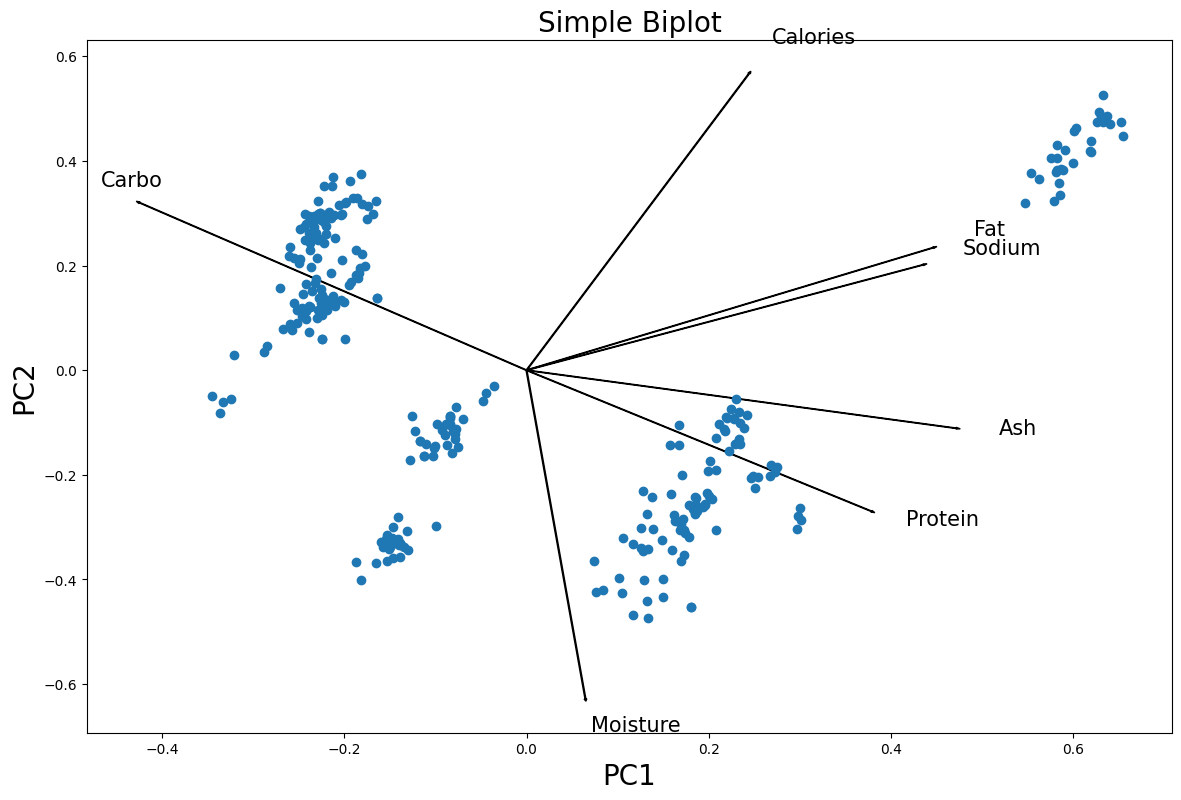

In [40]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(features):
  ax.arrow(0,0,loadings[0,i],loadings[1,i])
  ax.text(loadings[0,i]*1.1,loadings[1,i]*1.1,feature, fontsize=15)

ax.scatter(pc1*scalepc1, pc2*scalepc2)

ax.set_xlabel('PC1',fontsize=20)
ax.set_ylabel('PC2',fontsize=20)
ax.set_title('Simple Biplot',fontsize=20)

In [41]:
group = list(df.brand)
mapping_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,
                'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10}

brand = [mapping_dict[element] for element in group]

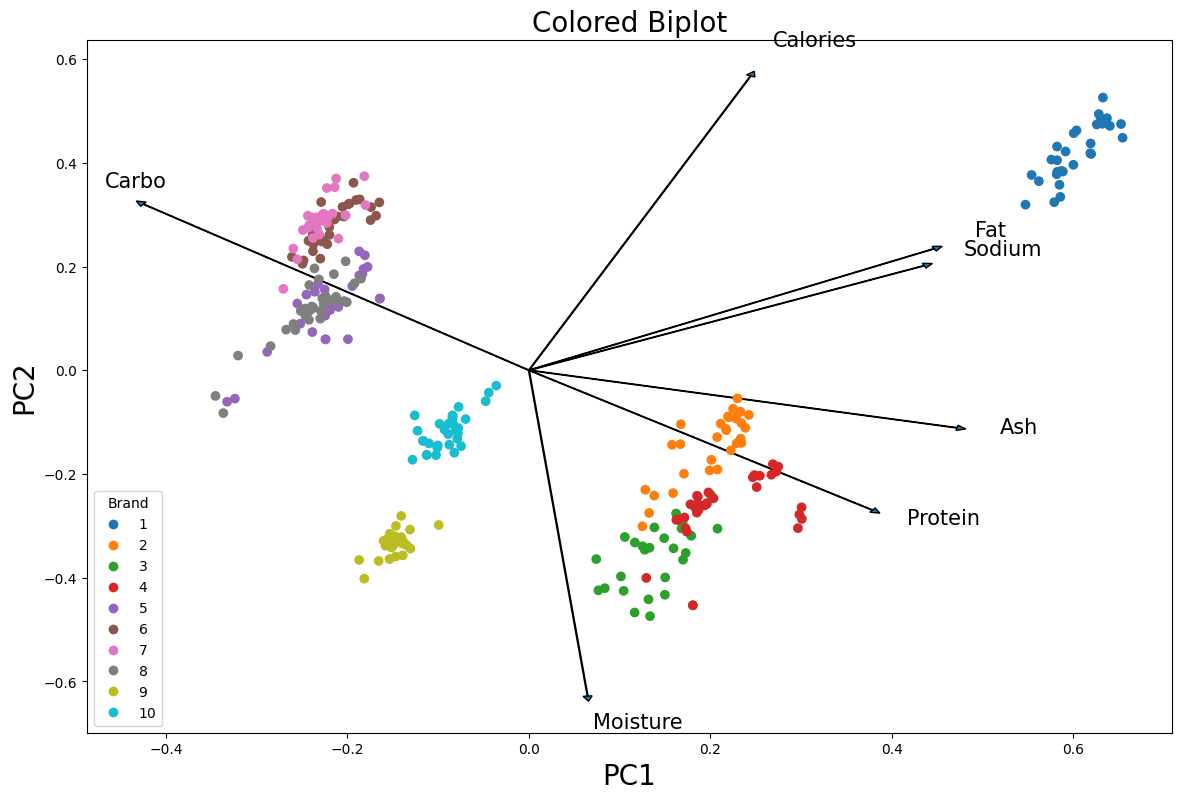

In [42]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(features):
  ax.arrow(0,0,loadings[0,i],loadings[1,i], head_width = 0.01,head_length=0.01)
  ax.text(loadings[0,i]*1.1,loadings[1,i]*1.1,feature, fontsize=15)

scatter = ax.scatter(pc1*scalepc1, pc2*scalepc2, c=brand, cmap='tab10')

ax.set_xlabel('PC1',fontsize=20)
ax.set_ylabel('PC2',fontsize=20)
ax.set_title('Colored Biplot',fontsize=20)

ax.legend(*scatter.legend_elements(), loc='lower left',title='Brand')

## EVALUATION

**EIGEN VALUE**

In [43]:
eval_sk = pca.explained_variance_
eval_sk

array([4.18573434, 2.29811778])

In [44]:
eigen_value_manual

array([4.18573434, 2.29811778])

**EIGEN VECTOR**

In [45]:
evec = pca.components_
evec

array([[ 0.06470937,  0.3787609 ,  0.44666592,  0.47188953,  0.43570289,
        -0.42491371,  0.2444873 ],
       [-0.62827587, -0.26970665,  0.23437908, -0.11099042,  0.20166165,
         0.32031208,  0.56745756]])

In [46]:
eigen_vector_manual.reshape(2,7)

array([[ 0.06470937,  0.62827587,  0.3787609 ,  0.26970665,  0.44666592,
        -0.23437908,  0.47188953],
       [ 0.11099042,  0.43570289, -0.20166165, -0.42491371, -0.32031208,
         0.2444873 , -0.56745756]])

**NEW FEATURES**

In [47]:
df_pc_sk.head()

,PC1,PC2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152


In [48]:
df_pc_manual.head()

,PC1,PC2
0,5.010343,-2.679215
1,5.023755,-2.529295
2,4.805439,-2.673700
3,4.469543,-2.285029
4,4.471893,-2.159152
